preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
   preg  plas  pres  skin  insu  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0


,preg,plas,pres,skin,insu,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insu,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


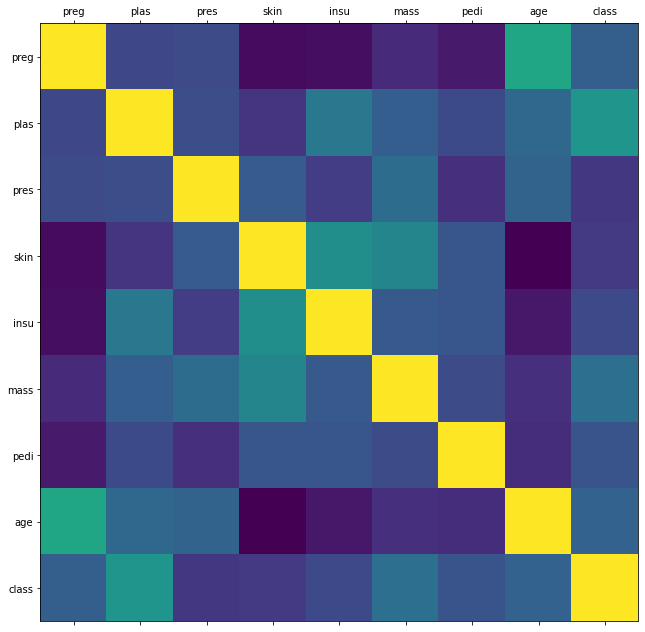

In [1]:
import pandas as pd
import numpy as np
import diabetes as db
import diabetes_train as tt
from sklearn import metrics

df = db.read_csv('diabetes.csv') # csv file is loaded
print(df.head(2))

df = db.negative_positive(df) 
print(df.head(2)) 

db.plot_corr(df) 
df.corr() # Note fx. that glycose correlates 46,7% with the class(diabetes) 

In [2]:
X_train, X_test, y_train,y_test = tt.train_data(df)
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


Total number of rows = 768

Number of rows missing - Pregnancies = 111
Number of rows missing - Glucose = 5
Number of rows missing - Bloodpressure  = 35
Number of rows missing - Skin thickness = 227
Number of rows missing - Insulin = 374
Number of rows missing - Body mass  = 11
Number of rows missing - Diabetes pedigree function = 0
Number of rows missing - Age  = 0

Total number of rows after cleaning = 336


,preg,plas,pres,skin,insu,mass,pedi,age,class
preg,1.000000,0.250519,0.298336,0.171517,0.101397,0.118681,0.025755,0.675202,0.309008
plas,0.250519,1.000000,0.237707,0.204054,0.587348,0.199681,0.117859,0.375484,0.515654
pres,0.298336,0.237707,1.000000,0.208907,0.100835,0.266723,0.016021,0.343854,0.241377
skin,0.171517,0.204054,0.208907,1.000000,0.202180,0.639901,0.132766,0.205159,0.266678
insu,0.101397,0.587348,0.100835,0.202180,1.000000,0.246661,0.179846,0.242045,0.333050
mass,0.118681,0.199681,0.266723,0.639901,0.246661,1.000000,0.126696,0.128185,0.278716
pedi,0.025755,0.117859,0.016021,0.132766,0.179846,0.126696,1.000000,0.074231,0.188130
age,0.675202,0.375484,0.343854,0.205159,0.242045,0.128185,0.074231,1.000000,0.391538
class,0.309008,0.515654,0.241377,0.266678,0.333050,0.278716,0.188130,0.391538,1.000000


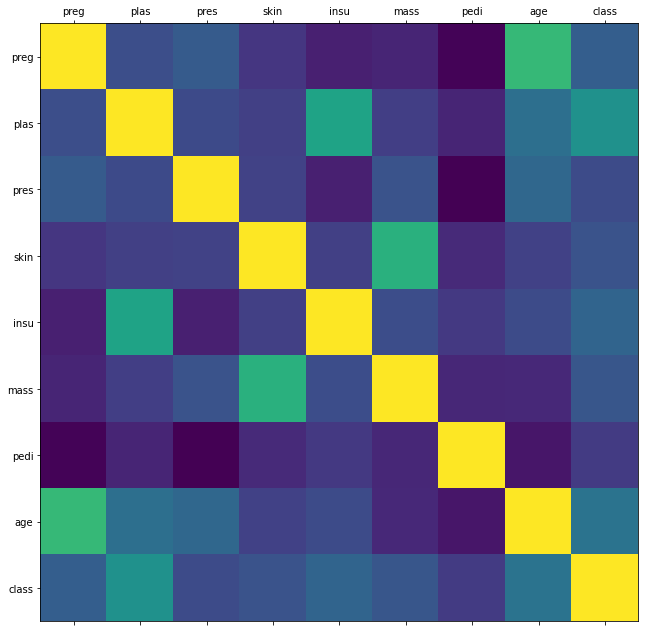

In [3]:
print("Total number of rows = {0}\n".format(len(df)))
print("Number of rows missing - Pregnancies = {0}".format(len(df.loc[df['preg'] == 0])))
print("Number of rows missing - Glucose = {0}".format(len(df.loc[df['plas'] == 0])))
print("Number of rows missing - Bloodpressure  = {0}".format(len(df.loc[df['pres'] == 0])))
print("Number of rows missing - Skin thickness = {0}".format(len(df.loc[df['skin'] == 0])))
print("Number of rows missing - Insulin = {0}".format(len(df.loc[df['insu'] == 0])))
print("Number of rows missing - Body mass  = {0}".format(len(df.loc[df['mass'] == 0])))
print("Number of rows missing - Diabetes pedigree function = {0}".format(len(df.loc[df['pedi'] == 0])))
print("Number of rows missing - Age  = {0}\n".format(len(df.loc[df['age'] == 0])))


df = df[(df['preg'] > 0) & (df['plas'] > 0) & (df['pres'] > 0) & (df['skin'] > 0) & (df['insu'] > 0) & (df['mass'] > 0) & (df['pedi'] > 0) & (df['age'] > 0)]
print("Total number of rows after cleaning = {0}".format(len(df)))
db.plot_corr(df) 
df.corr()   # Fewer data but no zero values in the df. 
            # Note fx. that glycose correlates 51,6% with the class(diabetes)

In [4]:
nb_model = tt.naive_bayes(X_train, y_train)
print(nb_model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [5]:

nb_predict_train_model = tt.models_acuracy(X_train, nb_model)

print("Accuracy: {0:.3f}".format(metrics.accuracy_score(y_train,nb_predict_train_model)))


Accuracy: 0.767


In [6]:
nb_predict_train_X_test = tt.models_acuracy_X_Test(y_test, nb_model)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y_test,nb_predict_train_X_test)))

Accuracy:0.623
